# 6.3 Naives Bates Classifier

El **teorema de Bayes** es un anunciado que vincula la probabilidad de un evento 'y' dado 'x' a la probabilidad de 'x' dado 'y', lo que tiene un enorme relevancia en ámbito científico.
- Permite detectar casualidad entre enventos de manera sencilla.
![](https://i.imgur.com/2ElMEYK.png)

La probabilidad de un suceso 'y', sabiendo que ha ocurrido 'x', es igual a la probabilidad de 'x' sabiendo que ha ocurrido 'y' multiplicado por la probabilidad a priori de 'y', que representaría nuestros conocimientos previos sobre cómo probable es que 'y' ocurra. Todo esto, dividido por la probabilidad global de que ocurra 'x'.

Los **clasificadores Naive Bayes** utilizan este teorema como fundamento para predecir la probabilidad de clasificar una cierta categoría.
- Se llama Naive (ingenuo en español) por la sanción nada realista de que todas las variables que usamos para explicar nuestro modelo son independientes entre sí.
    - Por ejemplo, si queremos predecir el salario de un trabajador dada su experiencia laboral y su edad, este modelo estaría suponiendo que ambas variables son totalmente independientes, lo que es claramente falso. De aquí lo de ingenuo.
    - Pero, aun así, sorprendentemente el método funciona razonablemente bien, aun fundamentándose en suposiciones erróneas.

**Modelo general**
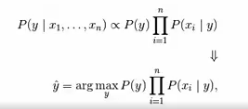

El modelo general toma la expresión que vemos aquí, donde se modelan cada una de las categorías de la variable que queremos clasificar. 
- Por ejemplo, si tratamos con datos sobre vuelos, que haya habido un retraso debido a condiciones meteorológicas, que haya habido un retraso debido al aeropuerto o que no haya habido un retraso.

El **arg max** que aparece en la función indica que nos vamos a quedar con la categoría que tenga una mayor probabilidad dada la información de la que disponemos.

**Variantes***
- Bernoulli Naive Bayes
    - Análisis de texto
   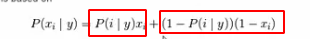
Asigna una probabilidad explícita a que ocurra un evento y una probabilidad explícita que no ocurra

- Multinomial Naive Bayes
    - Análisis de texto, contabilizan la ocurrencia de palabras
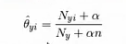
Asigna una probabilidad basada en el número de veces que ocurre una cierta palabra en un texto, añadiéndole un parámetro de suavizado.

- Gaussian Naive Bayes
Se usa para datos continuos, asume que las variables regresoras están distribuidas normalmente con la siguiente expresión
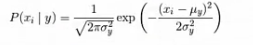
Asignando los parámetros Mu y Sigma basados en una clase concreta.

In [1]:
# Importar módulos 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
# Importar paquetes básicos
import numpy as np
import pandas as pd

df = pd.read_csv(r"/home/flavioisay/MEGAsync/Python para data science y big data esencial/base_datos_2008.csv")
# Mezclar
df = df.sample(frac=1)
# Escoger los primeros 500,000 datos
df = df.head(500000)

In [2]:
# Eliminar los datos faltantes
df = df.dropna(subset=['ArrDelay'])

In [3]:
# Generar una variable respuesta
# Todos aquellos vuelos que se han retrasado al menos un minuto
Y = df['ArrDelay'] > 0

In [4]:
# Métodos de bernoulli y multinomial se usan para análisis textual
# Generar bases de datos de ejemplo
df['Month'] = df['Month'].apply(str) #  Mes
df['DayofMonth'] = df['DayofMonth'].apply(str) # Dia del mes
df['DayOfWeek'] = df['DayOfWeek'].apply(str) # Dia del semana
df['TailNum'] = df['TailNum'].apply(str) # Número de cola del avión

# Generar variables Dummies (1 y 0)
X = pd.get_dummies(data=df[['Month','DayofMonth','TailNum','DayOfWeek','Origin','Dest','UniqueCarrier']])

In [5]:
# Objeto que se va a utilizar para intentar predecir si el vuelo se retrasa o no
X.head()
# Al no tratarse de datos textuales y ser variables poco explicativas el modelo tendra poco potencial predictivo

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
3187803,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2236659,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1725197,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5877288,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461166,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Ajustar el modelo

# Construir el objeto
clf = BernoulliNB()
# clf = MultinomialNB()
# Ajustar
clf.fit(X,Y)
Y_pred = clf.predict(X) # Hacer predicciones

In [ ]:
# Que porcentaje de casos se clasifican correctamente
np.mean(Y == Y_pred) # Predice correctamente prácticamente un 60% de los casos

In [ ]:
# Comparar con la media general de todos los casos
1 - np.mean(Y) # Al compararlo se observa que sólo se ha ganado un un tres y medio por ciento más en nuestro potencial predictivo, lo que esm uy poco
# Esto sucede porque las variables son poco explicativas y porque el modelo está orientado al análisis textual

In [ ]:
# Ajustar una variable numérica
X = df[['AirTime','Distance','TaxiIn','TaxiOut']] # DepDelay, es la variable más explciativa
# Ajustar el modelo Gaussiano
clf = GaussianNB() 
clf.fit(X,Y)
# Generar predicciones con los datos con las que se ha entrenado el modelo
Y_pred = clf.predict(X)

In [ ]:
# Equivalencia entre Y y las predicciones
np.mean(Y == Y_pred) # Se obtiene correctamente el 65% de los casos
# Al agregar DepDelay a X se puede ver que llega al 80%

El Naive Bayes es una aproximación totalmente distintaa a la modelización que conviene que se tenga en mente en caso de que se vaya a realizar un análisis textual o algún tipo de modelo donde necesites asumir que las variables sean gaussianas y quieras modelizarlo usando algunos tipo de "priors"